## Machine Learning - Regresión Logistica
**Link Dataset:** https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

df_obesity = pd.read_csv('obesity.csv')
df_obesity.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
# Select the columns we want to use
columns_to_select = ['Gender','CALC','FAVC','SCC','SMOKE','family_history_with_overweight','CAEC','MTRANS','NObeyesdad']
obesity = df_obesity.loc[:, columns_to_select]

# Drop rows with missing values
obesity.dropna(inplace=True)
obesity.head()

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
1,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
3,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I
4,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
obesity.shape

(2111, 9)

In [4]:
# Let's look at the different values of the 'Clarity' column
obesity['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [5]:
from sklearn.preprocessing import OrdinalEncoder
# Encode the 'Clarity' column using ordinal encoding
item_size_categories = [(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'])]
ordinal_features = ['NObeyesdad']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [6]:
from sklearn.preprocessing import OneHotEncoder
# Encode all the other features using one-hot encoding
categorical_features = ['Gender','CALC','FAVC','SCC','SMOKE','CAEC','MTRANS']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [7]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('ord', ordinal_encoder, ordinal_features),
     ('cat', categorical_encoder, categorical_features)
     ])
# Get the encoded features as a pandas DataFrame
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(obesity)
encoded_features.head()

,ord__NObeyesdad,cat__Gender_Female,cat__Gender_Male,cat__CALC_Always,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__FAVC_no,cat__FAVC_yes,cat__SCC_no,...,cat__SMOKE_yes,cat__CAEC_Always,cat__CAEC_Frequently,cat__CAEC_Sometimes,cat__CAEC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(obesity['family_history_with_overweight'])
encoded_obesity = encoded_features.assign(Family=encoded_label)
encoded_obesity.head()

,ord__NObeyesdad,cat__Gender_Female,cat__Gender_Male,cat__CALC_Always,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__FAVC_no,cat__FAVC_yes,cat__SCC_no,...,cat__CAEC_Always,cat__CAEC_Frequently,cat__CAEC_Sometimes,cat__CAEC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking,Family
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [9]:
# Let's look at the mapping between the encoded values and the original values
list(label_encoder.inverse_transform([0, 1]))

['no', 'yes']

In [10]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Construcción del modelo

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
# X is the encoded features
X = encoded_obesity[encoded_obesity.columns.difference(['Family'])]
# y is the encoded label
y = encoded_obesity['Family']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the obesity dataset
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model and print the results
print(classification_report(y_test, y_pred))
print('Predicted labels: ', y_pred)
print('F1-score: ',f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       0.52      0.18      0.27        83
           1       0.83      0.96      0.89       340

    accuracy                           0.81       423
   macro avg       0.67      0.57      0.58       423
weighted avg       0.77      0.81      0.77       423

Predicted labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [13]:
# Calcular R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

R^2: -0.22912827781715106


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

TN = np.sum((y_test == 0) & (y_pred == 0))
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

matrix_confusion=np.array([[TN,FP],[FN,TP]])
print(matrix_confusion)

accuracy_f = np.round(accuracy_score(y_test, y_pred),2)
precision_f = np.round(precision_score(y_test, y_pred),2)
recall_f = np.round(recall_score(y_test, y_pred),2)
f1_f = np.round(f1_score(y_test, y_pred),2)

precision = np.round((TP/(TP+FP)), 2)
recall = np.round((TP/(FN+TP)), 2)
f1 = np.round((2*((precision*recall)/(precision+recall))), 2)
accuracy = np.round(((TP+TN)/(TP+TN+FP+FN)), 2)


print(f"Precisión: Función: {precision_f} Manual: {precision}")
print(f"Recall:    Función: {recall_f} Manual: {recall}")
print(f"F1:        Función: {f1_f} Manual: {f1}")
print(f"Accuracy:  Función: {accuracy_f} Manual: {accuracy}")

[[ 15  68]
 [ 14 326]]
Precisión: Función: 0.83 Manual: 0.83
Recall:    Función: 0.96 Manual: 0.96
F1:        Función: 0.89 Manual: 0.89
Accuracy:  Función: 0.81 Manual: 0.81


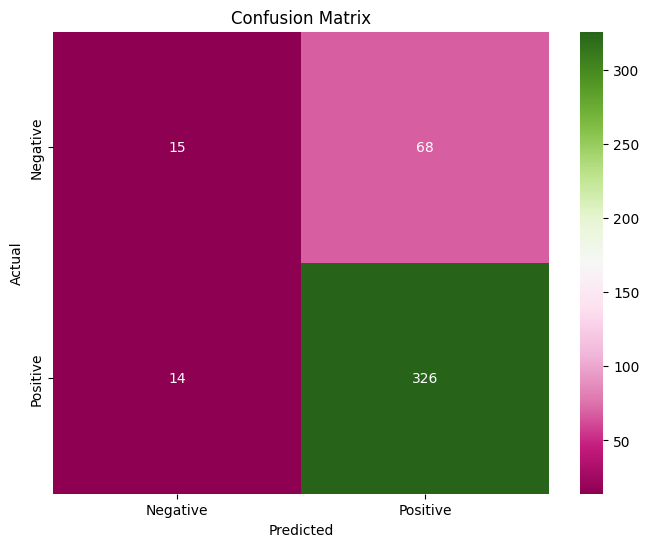

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

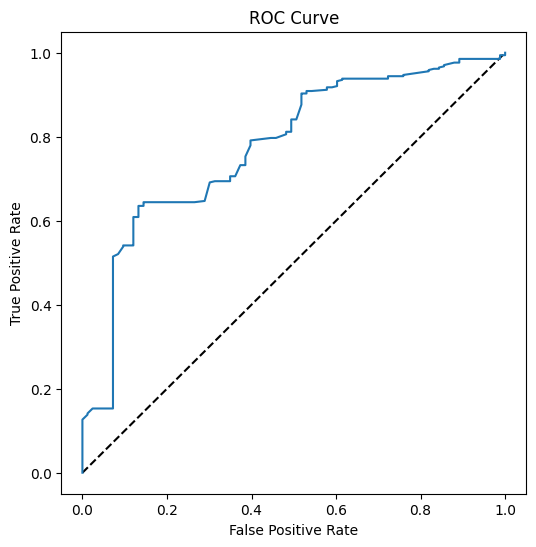

FPR: [0.         0.         0.         0.         0.         0.
 0.         0.01204819 0.01204819 0.02409639 0.03614458 0.07228916
 0.07228916 0.07228916 0.07228916 0.07228916 0.07228916 0.07228916
 0.08433735 0.09638554 0.09638554 0.12048193 0.12048193 0.12048193
 0.12048193 0.12048193 0.12048193 0.13253012 0.13253012 0.13253012
 0.14457831 0.14457831 0.14457831 0.26506024 0.28915663 0.30120482
 0.31325301 0.34939759 0.34939759 0.34939759 0.36144578 0.37349398
 0.38554217 0.38554217 0.38554217 0.39759036 0.39759036 0.39759036
 0.44578313 0.45783133 0.48192771 0.48192771 0.4939759  0.4939759
 0.4939759  0.4939759  0.4939759  0.5060241  0.51807229 0.51807229
 0.51807229 0.53012048 0.53012048 0.54216867 0.57831325 0.57831325
 0.59036145 0.60240964 0.60240964 0.60240964 0.61445783 0.61445783
 0.72289157 0.72289157 0.75903614 0.75903614 0.81927711 0.81927711
 0.8313253  0.84337349 0.84337349 0.85542169 0.85542169 0.87951807
 0.89156627 0.89156627 0.93975904 0.95180723 0.97590361 0.98795181

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# Mostrar los valores de FPR, TPR y thresholds para cada clase

print(f'FPR: {fpr}')
print(f'TPR: {tpr}')
print(f'Thresholds: {thresholds}\n')

In [17]:
# Calculate AUC score
auc = dict()
auc= roc_auc_score(y_test,y_scores[:,1])
print(f'AUC:{auc}')

AUC:0.7769666902905741


## Deep Learning

In [18]:
import keras
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

Prueba simulación red neuronal para regresión

In [19]:
# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],),kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))  # Capa de salida para regresión (una salida)

In [20]:
#Dividir datos en entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid =train_test_split(X_train_full, y_train_full)

In [21]:
from sklearn.preprocessing import StandardScaler
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

In [22]:
# Compilar el modelo:
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=[keras.metrics.RootMeanSquaredError(),'mean_absolute_percentage_error'])

In [23]:
# Entrenar el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit (X_train, y_train,epochs=250,validation_data=(X_valid, y_valid))

Epoch 1/250
40/40 [==============================] - 2s 10ms/step - loss: 0.4346 - root_mean_squared_error: 0.5902 - mean_absolute_percentage_error: 66637592.0000 - val_loss: 0.3737 - val_root_mean_squared_error: 0.5362 - val_mean_absolute_percentage_error: 73888440.0000
Epoch 2/250
40/40 [==============================] - 0s 3ms/step - loss: 0.3778 - root_mean_squared_error: 0.5402 - mean_absolute_percentage_error: 77542024.0000 - val_loss: 0.3313 - val_root_mean_squared_error: 0.4955 - val_mean_absolute_percentage_error: 83530552.0000
Epoch 3/250
40/40 [==============================] - 0s 4ms/step - loss: 0.3402 - root_mean_squared_error: 0.5044 - mean_absolute_percentage_error: 87988176.0000 - val_loss: 0.3065 - val_root_mean_squared_error: 0.4700 - val_mean_absolute_percentage_error: 90777800.0000
Epoch 4/250
40/40 [==============================] - 0s 5ms/step - loss: 0.3153 - root_mean_squared_error: 0.4794 - mean_absolute_percentage_error: 92376160.0000 - val_loss: 0.2892 - val

<Axes: >

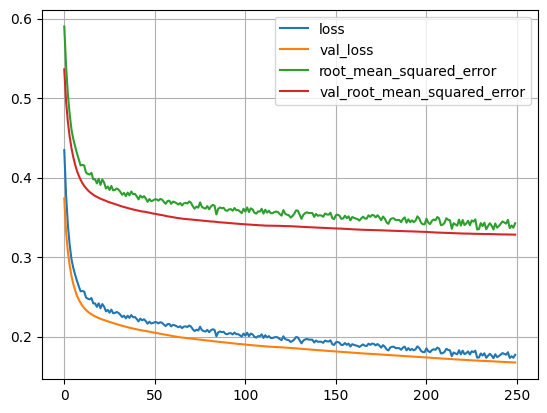

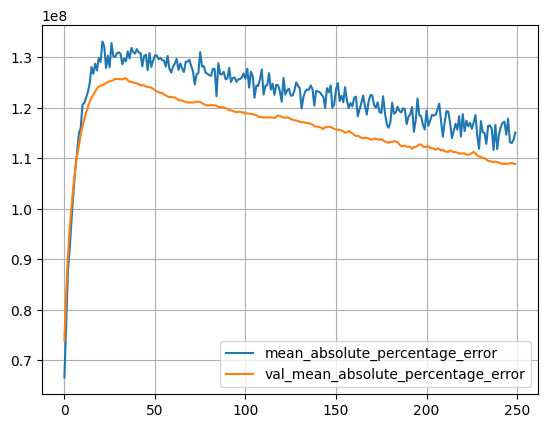

In [24]:
# Graficar el historial de entrenamiento:

dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot (grid=True)

In [25]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train:", loss)

print("root_mean_squared_error train:", RMSE)

print("mean_absolute_percentage_error train:", MAPE)
# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validacion")
print("loss valid:", loss)
print("root_mean_squared error valid:", RMSE)

print("mean_absolute_percentage_error valid:", MAPE)
# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test:", loss)

print("root_mean_squared_error test:", RMSE)
print("mean_absolute_percentage_error test:", MAPE)

40/40 [==============================] - 0s 2ms/step - loss: 0.1626 - root_mean_squared_error: 0.3209 - mean_absolute_percentage_error: 114531240.0000
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.16262954473495483
root_mean_squared_error train: 0.3208739459514618
mean_absolute_percentage_error train: 114531240.0
14/14 [==============================] - 0s 2ms/step - loss: 0.1674 - root_mean_squared_error: 0.3283 - mean_absolute_percentage_error: 108879872.0000
Evaluar el modelo en el conjunto de validacion
loss valid: 0.16744102537631989
root_mean_squared error valid: 0.3282857835292816
mean_absolute_percentage_error valid: 108879872.0
14/14 [==============================] - 0s 2ms/step - loss: 0.1822 - root_mean_squared_error: 0.3500 - mean_absolute_percentage_error: 124490872.0000
Evaluar el modelo en el conjunto de prueba
loss test: 0.18217399716377258
root_mean_squared_error test: 0.35000646114349365
mean_absolute_percentage_error test: 124490872.0


Prueba simulación red neuronal para clasificación

In [26]:
# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],),kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))  # Capa de salida para clasificación

In [33]:
#Dividir datos en entrenamiento y prueba
X_train_full_2, X_test_2, y_train_full_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2, X_valid_2, y_train_2, y_valid_2 =train_test_split(X_train_full_2, y_train_full_2)

In [34]:
from sklearn.preprocessing import StandardScaler
# Escalar las características
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_valid_2 = scaler.fit_transform(X_valid_2)
X_test_2 = scaler.transform(X_test_2)

In [35]:
# Compilar el modelo
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
# Entrenar el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_2 = model.fit (X_train_2, y_train_2,epochs=250,validation_data=(X_valid_2, y_valid_2))

Epoch 1/250
40/40 [==============================] - 2s 16ms/step - loss: 0.2748 - accuracy: 0.8934 - val_loss: 0.2146 - val_accuracy: 0.9265
Epoch 2/250
40/40 [==============================] - 0s 8ms/step - loss: 0.2729 - accuracy: 0.8902 - val_loss: 0.2154 - val_accuracy: 0.9265
Epoch 3/250
40/40 [==============================] - 0s 10ms/step - loss: 0.2665 - accuracy: 0.9068 - val_loss: 0.2133 - val_accuracy: 0.9289
Epoch 4/250
40/40 [==============================] - 1s 14ms/step - loss: 0.2675 - accuracy: 0.9060 - val_loss: 0.2206 - val_accuracy: 0.9194
Epoch 5/250
40/40 [==============================] - 0s 11ms/step - loss: 0.2460 - accuracy: 0.9076 - val_loss: 0.2214 - val_accuracy: 0.9123
Epoch 6/250
40/40 [==============================] - 0s 7ms/step - loss: 0.2513 - accuracy: 0.9139 - val_loss: 0.2215 - val_accuracy: 0.9265
Epoch 7/250
40/40 [==============================] - 1s 14ms/step - loss: 0.2493 - accuracy: 0.9100 - val_loss: 0.2245 - val_accuracy: 0.9123
Epoch 8/

14/14 [==============================] - 0s 3ms/step


<Figure size 800x600 with 0 Axes>

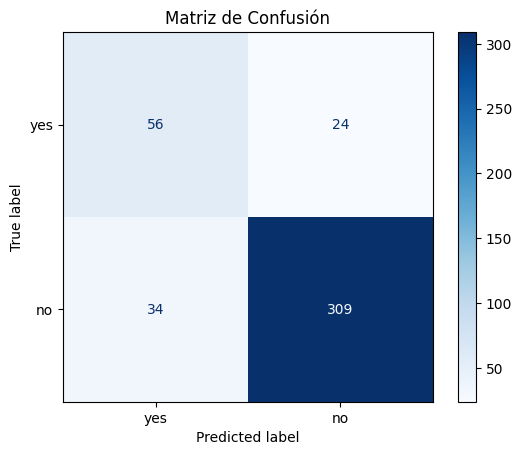

Predicted labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
F1-score:  0.719302181266224


In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predicciones en el conjunto de prueba
y_pred_2 = np.argmax(model.predict(X_test_2), axis=-1)

# Calcular matriz de confusión
cm = confusion_matrix(y_test_2, y_pred_2)

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['yes','no'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Evaluar el modelo
print('Predicted labels: ', y_pred)
print('F1-score: ', f1_score(y_test, y_pred, average='weighted'))

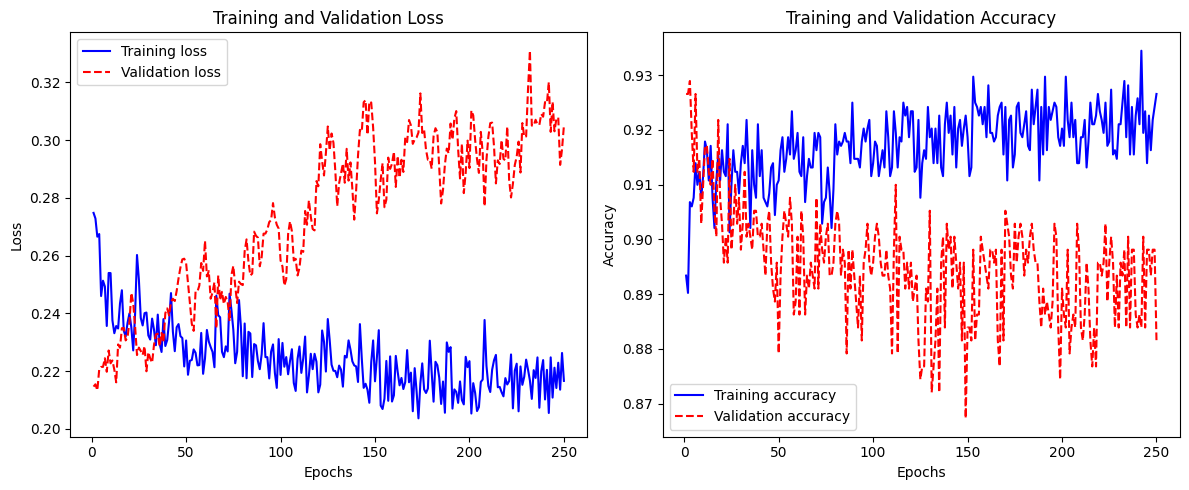

In [43]:
# Obtener registros de historia de entrenamiento
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
train_acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Graficar pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()